## An exemple: insertion sort

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif" style="width:50%; float:center">

The code to implement a insertion sort algorithm on top of numpy array

In [23]:
import numpy as np
def insertion_sort(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar.pop(i) # O(n - i)
            for insertion_index in range(len(ar)): # O(i)
                if key(ar[insertion_index]) >= key(el):
                    break
            ar.insert(insertion_index, el) # O(n - i)
        else:  
            previous = ar[i]
    return ar

# C = O(n) * ((2*O(n - i) + O(i))) = O(n²)

ar = list(np.random.randint(1, 100, 10))
print(ar)
insertion_sort(ar)

[98, 98, 84, 24, 40, 62, 94, 62, 3, 75]


[3, 24, 40, 62, 62, 75, 84, 94, 98, 98]

We are now plotting the complexity size of the container VS insertion sort time

100%|██████████| 100/100 [01:35<00:00,  1.04it/s]



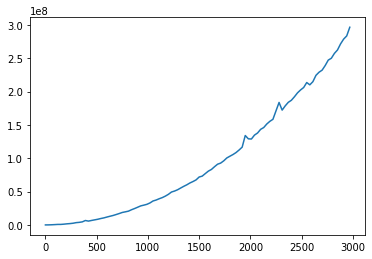

In [24]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 10
N = 3000
step = 30
times_v1 = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort(ar)
        times_v1[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1))

La courbe représente en abscisses la taille de la liste et en ordonnée le temps que le tri par sélection prend.
On observe que plus la taille de la liste augmente plus le temps d'exécution de l'algorithme augmente. Ce qui est cohérent.

We will now compare with the Python sorted function

100%|██████████| 100/100 [00:00<00:00, 286.23it/s]



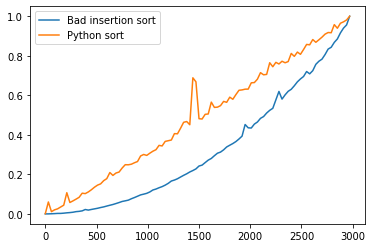

In [25]:
k = 10
N_default = 3000
step = 30
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1)/np.max(np.mean(times_v1, axis=1)), label="Bad insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

On remarque que pour une taille de liste plus petite que 1000 environ, le tri par défaut de python est moins rapide alors que pour des valeurs plus grandes que 1000 le tri par défaut de python devient beaucoup plus rapide. Cela montre que le programme du tri par insertion que nous avons nous-même codé n'est pas optimal. Le tri Python (sorted) nécessite un coût plus élevé au début mais possède une meilleure complexité asymptotique, ce qui le rend plus efficace pour les grandes listes.

Testing a merge k-sorted list algorithm  

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Loser_tree_merge.gif" style="width:50%; float:center">

In [26]:
from bisect import bisect_left

def insertion_sort3(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar[i]
            j = bisect_left(ar, el, lo=0, hi=i) # O(log(i))
            ar[j], ar[j+1:i+1] = el, ar[j:i] # O(i - j)
        else:
            previous = ar[i]
    return ar

# C = O(n²)

ar = list(np.random.randint(1, 100, 10))
insertion_sort3(ar)

[15, 26, 26, 30, 35, 49, 52, 73, 83, 98]

We compare with our previous implementation

In [27]:
ar = list(np.random.randint(1, 100, 1000))
%timeit insertion_sort(ar.copy())
%timeit insertion_sort3(ar.copy())

32.6 ms ± 211 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.57 ms ± 5.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.57 ms ± 5.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Nous pouvons voir suite à ces résultats que ce tri est beaucoup plus performant que le tri par insertion standard. Cela s'explique par l'utilisation de `bisect_left()` qui effectue une recherche binaire (O(log n)) au lieu de parcourir tous les éléments un par un (O(n)) pour trouver la position d'insertion. Pour 1000 éléments, on passe d'environ 1000 comparaisons à seulement 10 comparaisons.

We now compare with previous results

100%|██████████| 100/100 [00:09<00:00, 11.00it/s]



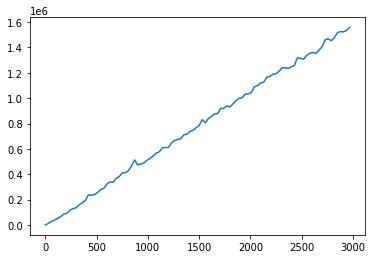

In [28]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 100
N = 3000
step = 30
n_errors = 10
times = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        insertion_sort3(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1))

100%|██████████| 100/100 [00:01<00:00, 78.88it/s]


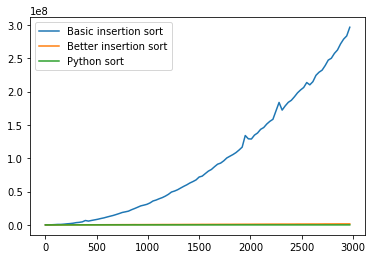

In [29]:
k = 100
N_default = 3000
step = 30
n_errors = 10
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0
        
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Basic insertion sort")
plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.legend()

Il faut que les données d'entrée soient les mêmes pour comparer des algorithmes entre eux. Par exemple, dans les tests précédents on utilisait des listes fortement mélangées, alors qu'ici les données sont faiblement triées (seulement 10 éléments échangés). Le tri Python (`sorted`) est particulièrement optimisé pour détecter et exploiter les séquences déjà triées, d'où sa performance exceptionnelle sur ces données. Le tri par insertion est aussi efficace sur les données presque triées car il a peu d'insertions à effectuer. Le basic insertion sort reste peu optimisé.

Should we change the container ?

We try with a sorted dictionnary

In [30]:
k = 100
N_default = 3000
step = 30
n_errors = 10
times_dict = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        res_dict = {ar[j] : ar[j] for j in range(i)}
        t0 = time_ns()
        sorted(res_dict)
        times_dict[i//step, j] = time_ns() - t0


k = 100
N_default2 = 30000
step = 30
n_errors = 10
times_dict_30000 = np.zeros((N_default2//step, k))
for i in tqdm(range(1, N_default2, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        res_dict = {ar[j] : ar[j] for j in range(i)}
        t0 = time_ns()
        sorted(res_dict)
        times_dict_30000[i//step, j] = time_ns() - t0

100%|██████████| 1000/1000 [03:05<00:00,  5.40it/s]


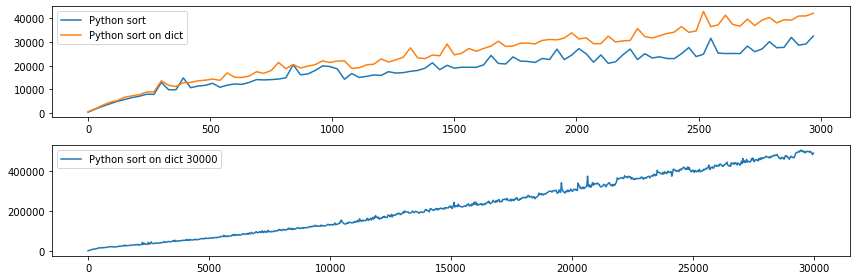

In [31]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 1, 1)
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_dict, axis=1), label="Python sort on dict")
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(np.arange(N_default2//step)*step, np.mean(times_dict_30000, axis=1), label="Python sort on dict 30000")
plt.legend()

plt.tight_layout()

Tri de dictionnaires vs listes

Le premier graphe montre que trier les clés d'un dictionnaire est plus lent que trier une liste. Cela s'explique car `sorted(dict)` doit d'abord extraire toutes les clés du dictionnaire (opération supplémentaire) avant de pouvoir les trier. Les dictionnaires Python sont optimisés pour l'accès aux éléments (O(1)), pas pour le tri. Le second graphe confirme que cette différence de performance reste constante même pour de grandes tailles (30000 éléments).

# Parallel sort Algorithms

100%|██████████| 100/100 [00:04<00:00, 23.52it/s]



Text(0.5, 1.0, 'Numba vs Python pur')

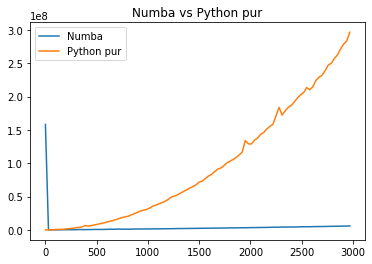

In [32]:
import numba as numba


@numba.njit
def insertion_sort_numba(ar):
    ar = ar.copy()
    n = len(ar)
    for i in numba.prange(1, n):
        key_item = ar[i]
        j = i - 1
        while j >= 0 and ar[j] > key_item:
            ar[j + 1] = ar[j]
            j -= 1
        ar[j + 1] = key_item
    return ar

'''
@numba.njit
def insertion_sort_parallel(ar):
    ar = np.array(ar.copy())
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if ar[i] < previous:
            el = ar[i]
            ar = np.delete(ar, i)

            insertion_index = 0
            for j in range(len(ar)): # O(i)
                if ar[j] >= el:
                    insertion_index = j
                    break
            ar = np.insert(ar, insertion_index, el)
            previous = ar[i] if i < len(ar) else previous

        else:  
            previous = ar[i]
    return ar
'''

k = 10
N = 3000
step = 30
times_v2 = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort_numba(ar)
        times_v2[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times_v2, axis=1), label="Numba")
plt.plot(np.arange(N//step)*step, np.mean(times_v1, axis=1), label="Python pur")
plt.legend()
plt.title("Numba vs Python pur")


Nous remarquons que le fait de paralléliser l'algorithme de tri par insertion a considérablement augmenté l'efficacité de l'algorithme en question comme le montre le graphe ci-dessus. On remarque également que pour des listes de petites tailles, la complexité de l'algo en séquentiel est meilleure que celle de l'algo en parallèle. Effectivement, pour de petites listes, le coût pour réaliser le parallélisme est beaucoup plus élevé que les gains obtenus. Vu que le tri est rapide, le fait de créer des threads et d'utiliser plus de cœurs sur le CPU consomme plus que le gain obtenu. Les petits pics sont dus au hasard et probablement au cache précédent. En effet, plus le nombre d'éléments non triés dans une liste est grand, plus il est difficile de le trier (d'où les bosses où le mélange des nombres est plus élevé).

**Note importante** : Nous avons dû modifier l'implémentation du tri par insertion pour la version Numba. En effet, Numba ne supporte pas certaines opérations Python comme `pop()`, `insert()`, `np.delete()` et `np.insert()`. Nous avons donc réécrit l'algorithme avec une approche plus basique en décalant les éléments manuellement dans un tableau, ce qui est compatible avec la compilation JIT de Numba.